In [ ]:
# Applied Data Analysis — Homework 5

Import common libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from os import path
from wordcloud import WordCloud
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

import pycountry
import itertools

def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(itertools.islice(iterable, n))

from nltk.corpus import opinion_lexicon
from nltk.sentiment import SentimentIntensityAnalyzer

import matplotlib
from sklearn import preprocessing


from gensim import corpora, models

c:\python\python35\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "
c:\python\python35\lib\site-packages\gensim\utils.py:840: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
c:\python\python35\lib\site-packages\gensim\utils.py:1015: UserWarning: Pattern library is not installed, lemmatization won't be available.
  warnings.warn("Pattern library is not installed, lemmatization won't be available.")


In [2]:
# Read the whole text.
df = pd.read_csv(path.join('hillary-clinton-emails', 'emails.csv'))
df.sample(5)

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
6446,6447,C05772174,CORRECTION,H,PIR,170.0,2010-09-09T04:00:00+00:00,2015-08-31T04:00:00+00:00,DOCUMENTS/HRCEmail_August_Web/IPS-0097/DOC_0C0...,O-2014-20439,...,NaN,PIR <preines,Huma Abedin,"Thursday, September 9, 2010 10:55 AM",F-2014-20439,C05772174,08/31/2015,RELEASE IN PART,"You're right, it was AP that got it wrong whic...",UNCLASSIFIED U.S. Department of State Case No....
6480,6481,C05772293,MITCHELL,H,jake.sullivan,87.0,2010-09-22T04:00:00+00:00,2015-08-31T04:00:00+00:00,DOCUMENTS/HRCEmail_August_Web/IPS-0098/DOC_0C0...,F-2014-20439,...,NaN,NaN,NaN,NaN,F-2014-20439,C05772293,08/31/2015,RELEASE IN PART,"jake.sullivan\r\nWednesday, September 22, 2010...",UNCLASSIFIED U.S. Department of State Case No....
3759,3760,C05766682,H: BREAKTHROUGH IN NI TALKS! SID,H,"Sullivan, Jacob J",87.0,2010-01-30T05:00:00+00:00,2015-08-31T04:00:00+00:00,DOCUMENTS/HRCEmail_August_Web/IPS-0061/DOC_0C0...,F-2014-20439,...,H,"Sullivan, Jacob J <SullivanJJ@state.gov>",NaN,"Saturday, January 30, 2010 10:34 PM",F-2014-20439,C05766682,08/31/2015,RELEASE IN PART,NaN,UNCLASSIFIED U.S. Department of State Case No....
7747,7748,C05776110,SHUTTLE,"Abedin, Huma",H,80.0,2010-05-31T04:00:00+00:00,2015-08-31T04:00:00+00:00,DOCUMENTS/HRCEmail_August_Web/IPS-0127/DOC_0C0...,F-2014-20439,...,Huma Abedin; 'ValmoroU@state.gov',H <hrod17@clintonemail.com>,NaN,"Monday, May 31, 2010 2:53 PM",F-2014-20439,C05776110,08/31/2015,RELEASE IN PART,Let's just stay w 6am tomorrow now. Thx.,UNCLASSIFIED U.S. Department of State Case No....
2043,2044,C05762680,WE HAVE INFORMED OUR CLOAKROOM THAT WE LIFT TH...,vermarr@state.gov,H,80.0,2009-12-16T05:00:00+00:00,2015-06-30T04:00:00+00:00,DOCUMENTS/HRCAll_1_1-29_JuneWEB/10_11_15_16/DO...,F-2014-20439,...,NaN,NaN,"Moncrief, Benjamin (LeMieux) <Benjamin_Moncrie...",NaN,F-2014-20439,C05762680,06/30/2015,RELEASE IN FULL,"H <hrod17@clintonemail.com >\r\nWednesday, Dec...",UNCLASSIFIED U.S. Department of State Case No....


In [3]:
len(df.index)

7945

In [4]:
df['ExtractedBodyText'].count()

6742

Based on above computations we can see thats ExtractedBodyText is missing in about 1200 cases. Anyway, for the sake of simplicity we have decided to use this column instead of RawText which would require a big amount of preprocessing.

In [5]:
df['ExtractedBodyText'] = df['ExtractedBodyText'].fillna('')

The above line of code just changes NaNs to empty string to maker further processing easier.

## Task 1

> Generate a word cloud based on the raw corpus -- I recommend you to use the [Python word_cloud library](https://github.com/amueller/word_cloud).
With the help of `nltk` (already available in your Anaconda environment), implement a standard text pre-processing 
pipeline (e.g., tokenization, stopword removal, stemming, etc.) and generate a new word cloud. Discuss briefly the pros and
cons (if any) of the two word clouds you generated.

(-0.5, 399.5, 199.5, -0.5)

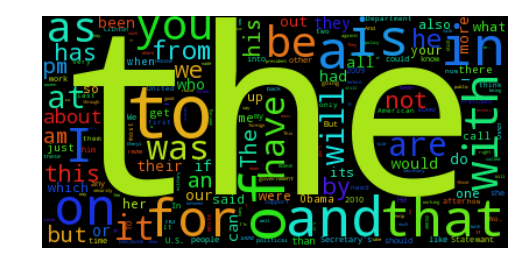

In [6]:
from collections import Counter
result = Counter(" ".join(df['ExtractedBodyText'].tolist()).split(" ")).most_common()
wordcloud = WordCloud().generate_from_frequencies(result)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")

We have generated wordcloud on the word frequencies form raw data witouth any preprocessing. Unsurprisingly, the word cloud consists of the most common words in English, be it articles, prepositions, pronouns and forms of verb is.

(-0.5, 399.5, 199.5, -0.5)

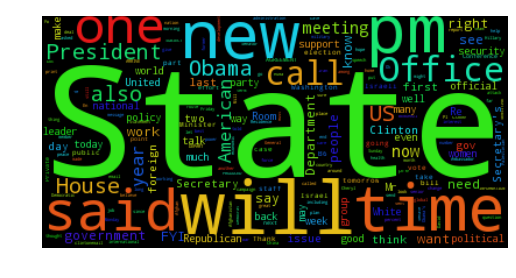

In [7]:
text = df['ExtractedBodyText'].str.cat(sep=' ')
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")

Here, we have generated word cloud from the raw text, but we let the worldcloud library to count the frequencies itself. The library has its own set of preprocessing steps such as removing stopwords, numbers as well as simple tokenization. Therefore, we can see that most of the basic common words in English language got filtered out.

#### Our  text pre-processing pipeline

Internet sources (http://www.nytimes.com/2008/12/03/us/politics/03clinton.html?_r=0) claim that Hillary Rodham Clinton is monolingual, i.e. she speaks only English. That is why we assume that all the emails written to and by her are exclusively in English.

In [8]:
tokens = nltk.word_tokenize(text)
tokens[:25]

['B6',
 'Thursday',
 ',',
 'March',
 '3',
 ',',
 '2011',
 '9:45',
 'PM',
 'H',
 ':',
 'Latest',
 'How',
 'Syria',
 'is',
 'aiding',
 'Qaddafi',
 'and',
 'more',
 '...',
 'Sid',
 'hrc',
 'memo',
 'syria',
 'aiding']

In [9]:
#remove punctutation
tokens_wo_punctuation = [token for token in tokens if token not in ['.', ',', '!', '?', ':', '-', '&', '<', '>', ';', '"', '@', '(', ')', "''", '``', '—', '--', "'", '[', ']', '•', '%', '...', '-•-', '-^']]
tokens_wo_punctuation[:25]

['B6',
 'Thursday',
 'March',
 '3',
 '2011',
 '9:45',
 'PM',
 'H',
 'Latest',
 'How',
 'Syria',
 'is',
 'aiding',
 'Qaddafi',
 'and',
 'more',
 'Sid',
 'hrc',
 'memo',
 'syria',
 'aiding',
 'libya',
 '030311.docx',
 'hrc',
 'memo']

In [10]:
my_stopwords = stopwords.words('english')
my_stopwords.extend(["n't", 'pm'])
tokens_wo_stopwords = [token for token in tokens_wo_punctuation if token.lower() not in my_stopwords]
tokens_wo_stopwords[:25]

['B6',
 'Thursday',
 'March',
 '3',
 '2011',
 '9:45',
 'H',
 'Latest',
 'Syria',
 'aiding',
 'Qaddafi',
 'Sid',
 'hrc',
 'memo',
 'syria',
 'aiding',
 'libya',
 '030311.docx',
 'hrc',
 'memo',
 'syria',
 'aiding',
 'libya',
 '030311.docx',
 'March']

In [11]:
# part of speech for token
tokens_tagged = nltk.pos_tag(tokens_wo_stopwords)
tokens_tagged[:25]

[('B6', 'NNP'),
 ('Thursday', 'NNP'),
 ('March', 'NNP'),
 ('3', 'CD'),
 ('2011', 'CD'),
 ('9:45', 'CD'),
 ('H', 'NNP'),
 ('Latest', 'NNP'),
 ('Syria', 'NNP'),
 ('aiding', 'VBG'),
 ('Qaddafi', 'NNP'),
 ('Sid', 'NNP'),
 ('hrc', 'NN'),
 ('memo', 'NN'),
 ('syria', 'NN'),
 ('aiding', 'VBG'),
 ('libya', 'JJ'),
 ('030311.docx', 'CD'),
 ('hrc', 'NN'),
 ('memo', 'NN'),
 ('syria', 'NN'),
 ('aiding', 'VBG'),
 ('libya', 'JJ'),
 ('030311.docx', 'CD'),
 ('March', 'NNP')]

We do not use stemming in this part of homework as we are interested in whole words. 

In [12]:
# mapping from POS_TAG to WordNet's part of speech (taken from http://stackoverflow.com/questions/15586721/wordnet-lemmatization-and-pos-tagging-in-python)
from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

In [13]:
lmtzr = WordNetLemmatizer()
def lemmatize(token, treebank_tag):
    wordnet_pos = get_wordnet_pos(treebank_tag)
    if wordnet_pos:
        return lmtzr.lemmatize(token, wordnet_pos), wordnet_pos
    else:
        return token, wordnet_pos

In [14]:
# lemmed_tokens = [lemmatize(token, part_of_speech) for token, part_of_speech in tokens_tagged]
# lemmatize and filter out only parts of speech we are interested in (NOUNS, VERBS, ADJECTIVES, ADVERBS)
lemmed_tokens  = [lemmed_token for lemmed_token, wordnet_pos in (lemmatize(token, part_of_speech) for token, part_of_speech in tokens_tagged) if wordnet_pos is not None]
lemmed_tokens[:25]

['B6',
 'Thursday',
 'March',
 'H',
 'Latest',
 'Syria',
 'aid',
 'Qaddafi',
 'Sid',
 'hrc',
 'memo',
 'syria',
 'aid',
 'libya',
 'hrc',
 'memo',
 'syria',
 'aid',
 'libya',
 'March',
 'Hillary',
 'Thx',
 'H',
 'hrod17',
 'clintonemail.com']

We have moved normalization to the end of the pipeline because some of the methods used before are sensitive to dots and case. For example, if we used normalization on "U.S.", "u.s.", "US" all would result in "us", then nltk.pos_tag([token,]) method would mark it as personal pronoun (PRP) instead of noun (N*) and thus it would get filtered out. "u.s." gets tagged as Verb, non-3rd person singular present (VBP) which is incorect, but as we do not filter out verbs it does not cause any problems to our computations.

In [15]:
nltk.pos_tag(['U.S.', 'US', 'u.s.', 'us',])

[('U.S.', 'NNP'), ('US', 'NNP'), ('u.s.', 'VBP'), ('us', 'PRP')]

In [16]:
# normalization / case-folding & in-token punctuation removal
translator = str.maketrans({key: None for key in string.punctuation})

def normalize_token(token):
    norm_token = token.lower()
    norm_token = norm_token.translate(translator)
    return norm_token

norm_tokens = [normalize_token(token) for token in lemmed_tokens]
norm_tokens[:25]

['b6',
 'thursday',
 'march',
 'h',
 'latest',
 'syria',
 'aid',
 'qaddafi',
 'sid',
 'hrc',
 'memo',
 'syria',
 'aid',
 'libya',
 'hrc',
 'memo',
 'syria',
 'aid',
 'libya',
 'march',
 'hillary',
 'thx',
 'h',
 'hrod17',
 'clintonemailcom']

In [17]:
result = Counter(norm_tokens).most_common()
result[:25]

[('say', 2111),
 ('state', 1792),
 ('call', 1549),
 ('us', 1403),
 ('secretary', 1362),
 ('obama', 1222),
 ('work', 1215),
 ('get', 1176),
 ('office', 1144),
 ('time', 1138),
 ('president', 1122),
 ('new', 1103),
 ('go', 1084),
 ('make', 1071),
 ('also', 1010),
 ('see', 996),
 ('house', 969),
 ('know', 922),
 ('department', 887),
 ('year', 864),
 ('want', 861),
 ('h', 846),
 ('fyi', 828),
 ('think', 826),
 ('people', 824)]

(-0.5, 399.5, 199.5, -0.5)

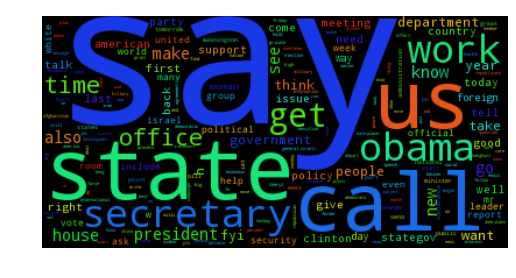

In [18]:
wordcloud = WordCloud().generate_from_frequencies(result)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")

We can see some differences to the word cloud generated automatically by the library. 

With our text pre-processing pipeline "State" is no longer the most dominant word. It is because we use lemmatization and thus, for example, "say", "said", "saying" is aggreagated in one token "say" and consequently sum of the occurencies of "say", "said", "saying" is bigger the the one of "state". The lemmatization is an advantage of our pipeline in comparison wiht the library's pipeline.

Additionally, the token "Will" disappeared altogether. It is becuase, unlike wordcloud library's pipeline, our pipleine considers it a stopword. Whether this is correct or not is up to a discussion as this way we remove not only future tense auxiliary verb, but also noun "will", adjective "willing" etc. Anyway, wordcloud library uses its own stopword list which might not be comprehensive enough and updated to the current standards. We have decided to turst the stopwords list of nltk library instead.

Another difference is that we have normalized the tokens while the worldcloud library did not. We have put all the tokens into lowercase and removed punctuation from them. This way we get lowercase names which might be considered an disadvantage. On the other hand, we get way more accurate frequencies of the words (even for names, as occasionally people do not capitalize names). The removal of punctuation helped us ot get a more accurate frequency of terms such as "U.S." / "US" / "u.s." / "us". 

## Task 2

> Find all the mentions of world countries in the whole corpus, using the `pycountry` utility (*HINT*: remember that
there will be different surface forms for the same country in the text, e.g., Switzerland, switzerland, CH, etc.)
Perform sentiment analysis on every email message using the demo methods in the `nltk.sentiment.util` module. Aggregate 
the polarity information of all the emails by country, and plot a histogram (ordered and colored by polarity level)
that summarizes the perception of the different countries. Repeat the aggregation + plotting steps using different demo
methods from the sentiment analysis module -- can you find substantial differences?

At first, we have taken a look at the output of the pycountry library. We have recognized that `alpha_2`, `alpha_3` and `name` propertiers might be usuful for our needs. We have built a dictionary from these 3 properties. Natutrally, have we skipped `official_name` because it is too complex and we assume that almost nobody is using it in private conversations, while its most important part is covered in `name` parameter.

In [19]:
for country in list(pycountry.countries)[:10]:
    print(country)

Country(alpha_2='AW', alpha_3='ABW', name='Aruba', numeric='533')
Country(alpha_2='AF', alpha_3='AFG', name='Afghanistan', numeric='004', official_name='Islamic Republic of Afghanistan')
Country(alpha_2='AO', alpha_3='AGO', name='Angola', numeric='024', official_name='Republic of Angola')
Country(alpha_2='AI', alpha_3='AIA', name='Anguilla', numeric='660')
Country(alpha_2='AX', alpha_3='ALA', name='Åland Islands', numeric='248')
Country(alpha_2='AL', alpha_3='ALB', name='Albania', numeric='008', official_name='Republic of Albania')
Country(alpha_2='AD', alpha_3='AND', name='Andorra', numeric='020', official_name='Principality of Andorra')
Country(alpha_2='AE', alpha_3='ARE', name='United Arab Emirates', numeric='784')
Country(alpha_2='AR', alpha_3='ARG', name='Argentina', numeric='032', official_name='Argentine Republic')
Country(alpha_2='AM', alpha_3='ARM', name='Armenia', numeric='051', official_name='Republic of Armenia')


In [20]:
countries_dict = {country.alpha_2: [country.alpha_2, country.alpha_3, country.name, ] for country in pycountry.countries}

In [21]:
countries_dict

{'AD': ['AD', 'AND', 'Andorra'],
 'AE': ['AE', 'ARE', 'United Arab Emirates'],
 'AF': ['AF', 'AFG', 'Afghanistan'],
 'AG': ['AG', 'ATG', 'Antigua and Barbuda'],
 'AI': ['AI', 'AIA', 'Anguilla'],
 'AL': ['AL', 'ALB', 'Albania'],
 'AM': ['AM', 'ARM', 'Armenia'],
 'AO': ['AO', 'AGO', 'Angola'],
 'AQ': ['AQ', 'ATA', 'Antarctica'],
 'AR': ['AR', 'ARG', 'Argentina'],
 'AS': ['AS', 'ASM', 'American Samoa'],
 'AT': ['AT', 'AUT', 'Austria'],
 'AU': ['AU', 'AUS', 'Australia'],
 'AW': ['AW', 'ABW', 'Aruba'],
 'AX': ['AX', 'ALA', 'Åland Islands'],
 'AZ': ['AZ', 'AZE', 'Azerbaijan'],
 'BA': ['BA', 'BIH', 'Bosnia and Herzegovina'],
 'BB': ['BB', 'BRB', 'Barbados'],
 'BD': ['BD', 'BGD', 'Bangladesh'],
 'BE': ['BE', 'BEL', 'Belgium'],
 'BF': ['BF', 'BFA', 'Burkina Faso'],
 'BG': ['BG', 'BGR', 'Bulgaria'],
 'BH': ['BH', 'BHR', 'Bahrain'],
 'BI': ['BI', 'BDI', 'Burundi'],
 'BJ': ['BJ', 'BEN', 'Benin'],
 'BL': ['BL', 'BLM', 'Saint Barthélemy'],
 'BM': ['BM', 'BMU', 'Bermuda'],
 'BN': ['BN', 'BRN', 'Brune

However, after analysing resulting dictionary we have realized that some the simplified country names are still too complex which decerase probability that we will find a match drastically. Coinsidentally, this is often the case for countries that are, from geopolitcal point of view, of interest for results of this analysis. Therefore, to increase the chance of correct match, we have expanded the coutry names list with simpler terms or alternatives

Examples:
* Russian Federation => Russia
* Iran, Islamic Republic of => Iran
* Syrian Arab Republic => Syria
* United Kingdom => Great Britain, Britain
* Korea, Democratic People's Republic of => North Korea
* Korea, Republic of => South Korea
* Venezuela, Bolivarian Republic of => Venezuela
* Taiwan, Province of China => Taiwan
* Lao People's Democratic Republic => Laos
* Myanmar => Burma
* Holy See (Vatican City State) => Vatican
* Palestine, State of => Palestine
* New Zealand => Zealand
* Puerto Rico => Porto Rico, PuertoRico, PortoRico (all names compared in lowercase)
* and several others

Additionally, we have removed (replaced by empty string) some alpha_2 codes which (might) "collide" with other parts of the text and thus (might) return false matches. They are PM AM TO RE NO MR VE (YT PS).

In [22]:
# whole extended country dictionary
improved_country_list = {
    'AD': ['AD', 'AND', 'Andorra'],
    'AE': ['AE', 'ARE', 'United Arab Emirates', 'UAE', 'Emirates'],
    'AF': ['AF', 'AFG', 'Afghanistan'],
    'AG': ['AG', 'ATG', 'Antigua and Barbuda', 'Antigua', 'Barbuda'],
    'AI': ['AI', 'AIA', 'Anguilla'],
    'AL': ['AL', 'ALB', 'Albania'],
    'AM': ['', 'ARM', 'Armenia'],
    'AO': ['AO', 'AGO', 'Angola'],
    'AQ': ['AQ', 'ATA', 'Antarctica'],
    'AR': ['AR', 'ARG', 'Argentina'],
    'AS': ['AS', 'ASM', 'American Samoa'],
    'AT': ['AT', 'AUT', 'Austria'],
    'AU': ['AU', 'AUS', 'Australia'],
    'AW': ['AW', 'ABW', 'Aruba'],
    'AX': ['AX', 'ALA', 'Åland Islands', 'Åland', 'Aland'],
    'AZ': ['AZ', 'AZE', 'Azerbaijan'],
    'BA': ['BA', 'BIH', 'Bosnia and Herzegovina', 'Bosnia'],
    'BB': ['BB', 'BRB', 'Barbados'],
    'BD': ['BD', 'BGD', 'Bangladesh'],
    'BE': ['BE', 'BEL', 'Belgium'],
    'BF': ['BF', 'BFA', 'Burkina Faso', 'Burkina'],
    'BG': ['BG', 'BGR', 'Bulgaria'],
    'BH': ['BH', 'BHR', 'Bahrain'],
    'BI': ['BI', 'BDI', 'Burundi'],
    'BJ': ['BJ', 'BEN', 'Benin'],
    'BL': ['BL', 'BLM', 'Saint Barthélemy', 'Barthélemy', 'Barths', 'Barts'],
    'BM': ['BM', 'BMU', 'Bermuda'],
    'BN': ['BN', 'BRN', 'Brunei Darussalam', 'Brunei'],
    'BO': ['BO', 'BOL', 'Bolivia, Plurinational State of', 'Bolivia'],
    'BQ': ['BQ', 'BES', 'Bonaire, Sint Eustatius and Saba', 'Bonaire'],
    'BR': ['BR', 'BRA', 'Brazil'],
    'BS': ['BS', 'BHS', 'Bahamas'],
    'BT': ['BT', 'BTN', 'Bhutan'],
    'BV': ['BV', 'BVT', 'Bouvet Island', 'Bouvet'],
    'BW': ['BW', 'BWA', 'Botswana'],
    'BY': ['BY', 'BLR', 'Belarus'],
    'BZ': ['BZ', 'BLZ', 'Belize'],
    'CA': ['CA', 'CAN', 'Canada'],
    'CC': ['CC', 'CCK', 'Cocos (Keeling) Islands', 'Cocos', 'Keeling'],
    'CD': ['CD', 'COD', 'Congo, The Democratic Republic of the', 'DR Congo', 'DRC', 'DROC', 'Congo-Kinshasa', 'Zaire'],
    'CF': ['CF', 'CAF', 'Central African Republic', 'CAR'],
    'CG': ['CG', 'COG', 'Congo'],
    'CH': ['CH', 'CHE', 'Switzerland'],
    'CI': ['CI', 'CIV', "Côte d'Ivoire", 'Ivory Coast', 'Ivory', 'Côte', 'Ivoire', 'Cote'],
    'CK': ['CK', 'COK', 'Cook Islands'],
    'CL': ['CL', 'CHL', 'Chile'],
    'CM': ['CM', 'CMR', 'Cameroon'],
    'CN': ['CN', 'CHN', 'China'],
    'CO': ['CO', 'COL', 'Colombia'],
    'CR': ['CR', 'CRI', 'Costa Rica', 'CostaRica'],
    'CU': ['CU', 'CUB', 'Cuba'],
    'CV': ['CV', 'CPV', 'Cabo Verde', 'Cape Verde', 'CapeVerde'],
    'CW': ['CW', 'CUW', 'Curaçao', 'Curacao'],
    'CX': ['CX', 'CXR', 'Christmas Island'],
    'CY': ['CY', 'CYP', 'Cyprus'],
    'CZ': ['CZ', 'CZE', 'Czechia', 'Czech'],
    'DE': ['DE', 'DEU', 'Germany'],
    'DJ': ['DJ', 'DJI', 'Djibouti'],
    'DK': ['DK', 'DNK', 'Denmark'],
    'DM': ['DM', 'DMA', 'Dominica'],
    'DO': ['DO', 'DOM', 'Dominican Republic'],
    'DZ': ['DZ', 'DZA', 'Algeria'],
    'EC': ['EC', 'ECU', 'Ecuador'],
    'EE': ['EE', 'EST', 'Estonia'],
    'EG': ['EG', 'EGY', 'Egypt'],
    'EH': ['EH', 'ESH', 'Western Sahara', 'Sahara'],
    'ER': ['ER', 'ERI', 'Eritrea'],
    'ES': ['ES', 'ESP', 'Spain'],
    'ET': ['ET', 'ETH', 'Ethiopia'],
    'FI': ['FI', 'FIN', 'Finland'],
    'FJ': ['FJ', 'FJI', 'Fiji'],
    'FK': ['FK', 'FLK', 'Falkland Islands (Malvinas)', 'Falkland', 'Malvinas'],
    'FM': ['FM', 'FSM', 'Micronesia, Federated States of', 'Micronesia'],
    'FO': ['FO', 'FRO', 'Faroe Islands', 'Faroe'],
    'FR': ['FR', 'FRA', 'France'],
    'GA': ['GA', 'GAB', 'Gabon'],
    'GB': ['GB', 'GBR', 'United Kingdom', 'Great Britain', 'Britain'],
    'GD': ['GD', 'GRD', 'Grenada'],
    'GE': ['GE', 'GEO', 'Georgia'],
    'GF': ['GF', 'GUF', 'French Guiana', 'Guiana'],
    'GG': ['GG', 'GGY', 'Guernsey'],
    'GH': ['GH', 'GHA', 'Ghana'],
    'GI': ['GI', 'GIB', 'Gibraltar'],
    'GL': ['GL', 'GRL', 'Greenland'],
    'GM': ['GM', 'GMB', 'Gambia'],
    'GN': ['GN', 'GIN', 'Guinea'],
    'GP': ['GP', 'GLP', 'Guadeloupe'],
    'GQ': ['GQ', 'GNQ', 'Equatorial Guinea'],
    'GR': ['GR', 'GRC', 'Greece'],
    'GS': ['GS', 'SGS', 'South Georgia and the South Sandwich Islands'],
    'GT': ['GT', 'GTM', 'Guatemala'],
    'GU': ['GU', 'GUM', 'Guam'],
    'GW': ['GW', 'GNB', 'Guinea-Bissau'],
    'GY': ['GY', 'GUY', 'Guyana'],
    'HK': ['HK', 'HKG', 'Hong Kong'],
    'HM': ['HM', 'HMD', 'Heard Island and McDonald Islands'],
    'HN': ['HN', 'HND', 'Honduras'],
    'HR': ['HR', 'HRV', 'Croatia'],
    'HT': ['HT', 'HTI', 'Haiti'],
    'HU': ['HU', 'HUN', 'Hungary'],
    'ID': ['ID', 'IDN', 'Indonesia'],
    'IE': ['IE', 'IRL', 'Ireland'],
    'IL': ['IL', 'ISR', 'Israel'],
    'IM': ['IM', 'IMN', 'Isle of Man'],
    'IN': ['IN', 'IND', 'India'],
    'IO': ['IO', 'IOT', 'British Indian Ocean Territory'],
    'IQ': ['IQ', 'IRQ', 'Iraq'],
    'IR': ['IR', 'IRN', 'Iran, Islamic Republic of', 'Iran'],
    'IS': ['IS', 'ISL', 'Iceland'],
    'IT': ['IT', 'ITA', 'Italy'],
    'JE': ['JE', 'JEY', 'Jersey'],
    'JM': ['JM', 'JAM', 'Jamaica'],
    'JO': ['JO', 'JOR', 'Jordan'],
    'JP': ['JP', 'JPN', 'Japan'],
    'KE': ['KE', 'KEN', 'Kenya'],
    'KG': ['KG', 'KGZ', 'Kyrgyzstan'],
    'KH': ['KH', 'KHM', 'Cambodia'],
    'KI': ['KI', 'KIR', 'Kiribati'],
    'KM': ['KM', 'COM', 'Comoros'],
    'KN': ['KN', 'KNA', 'Saint Kitts and Nevis', 'Kitts'],
    'KP': ['KP', 'PRK', "Korea, Democratic People's Republic of", 'North Korea'],
    'KR': ['KR', 'KOR', 'Korea, Republic of', 'South Korea'],
    'KW': ['KW', 'KWT', 'Kuwait'],
    'KY': ['KY', 'CYM', 'Cayman Islands', 'Cayman'],
    'KZ': ['KZ', 'KAZ', 'Kazakhstan'],
    'LA': ['LA', 'LAO', "Lao People's Democratic Republic", 'Laos'],
    'LB': ['LB', 'LBN', 'Lebanon'],
    'LC': ['LC', 'LCA', 'Saint Lucia'],
    'LI': ['LI', 'LIE', 'Liechtenstein'],
    'LK': ['LK', 'LKA', 'Sri Lanka', 'Ceylon'],
    'LR': ['LR', 'LBR', 'Liberia'],
    'LS': ['LS', 'LSO', 'Lesotho'],
    'LT': ['LT', 'LTU', 'Lithuania'],
    'LU': ['LU', 'LUX', 'Luxembourg'],
    'LV': ['LV', 'LVA', 'Latvia'],
    'LY': ['LY', 'LBY', 'Libya'],
    'MA': ['MA', 'MAR', 'Morocco'],
    'MC': ['MC', 'MCO', 'Monaco'],
    'MD': ['MD', 'MDA', 'Moldova, Republic of', 'Moldova'],
    'ME': ['ME', 'MNE', 'Montenegro'],
    'MF': ['MF', 'MAF', 'Saint Martin (French part)'],
    'MG': ['MG', 'MDG', 'Madagascar'],
    'MH': ['MH', 'MHL', 'Marshall Islands'],
    'MK': ['MK', 'MKD', 'Macedonia, Republic of', 'Macedonia'],
    'ML': ['ML', 'MLI', 'Mali'],
    'MM': ['MM', 'MMR', 'Myanmar', 'Burma'],
    'MN': ['MN', 'MNG', 'Mongolia'],
    'MO': ['MO', 'MAC', 'Macao'],
    'MP': ['MP', 'MNP', 'Northern Mariana Islands'],
    'MQ': ['MQ', 'MTQ', 'Martinique'],
    'MR': ['', 'MRT', 'Mauritania'],
    'MS': ['MS', 'MSR', 'Montserrat'],
    'MT': ['MT', 'MLT', 'Malta'],
    'MU': ['MU', 'MUS', 'Mauritius'],
    'MV': ['MV', 'MDV', 'Maldives'],
    'MW': ['MW', 'MWI', 'Malawi'],
    'MX': ['MX', 'MEX', 'Mexico'],
    'MY': ['MY', 'MYS', 'Malaysia'],
    'MZ': ['MZ', 'MOZ', 'Mozambique'],
    'NA': ['NA', 'NAM', 'Namibia'],
    'NC': ['NC', 'NCL', 'New Caledonia', 'Caledonia'],
    'NE': ['NE', 'NER', 'Niger'],
    'NF': ['NF', 'NFK', 'Norfolk Island', 'Norfolk'],
    'NG': ['NG', 'NGA', 'Nigeria'],
    'NI': ['NI', 'NIC', 'Nicaragua'],
    'NL': ['NL', 'NLD', 'Netherlands'],
    'NO': ['', 'NOR', 'Norway'],
    'NP': ['NP', 'NPL', 'Nepal'],
    'NR': ['NR', 'NRU', 'Nauru'],
    'NU': ['NU', 'NIU', 'Niue'],
    'NZ': ['NZ', 'NZL', 'New Zealand', 'Zealand'],
    'OM': ['OM', 'OMN', 'Oman'],
    'PA': ['PA', 'PAN', 'Panama'],
    'PE': ['PE', 'PER', 'Peru'],
    'PF': ['PF', 'PYF', 'French Polynesia', 'Polynesia'],
    'PG': ['PG', 'PNG', 'Papua New Guinea', 'Papua'],
    'PH': ['PH', 'PHL', 'Philippines'],
    'PK': ['PK', 'PAK', 'Pakistan'],
    'PL': ['PL', 'POL', 'Poland'],
    'PM': ['', 'SPM', 'Saint Pierre and Miquelon', 'Saint Pierre'],
    'PN': ['PN', 'PCN', 'Pitcairn'],
    'PR': ['PR', 'PRI', 'Puerto Rico', 'Porto Rico', 'PuertoRico', 'PortoRico'],
    'PS': ['', 'PSE', 'Palestine, State of', 'Palestine'],
    'PT': ['PT', 'PRT', 'Portugal'],
    'PW': ['PW', 'PLW', 'Palau'],
    'PY': ['PY', 'PRY', 'Paraguay'],
    'QA': ['QA', 'QAT', 'Qatar'],
    'RE': ['', 'REU', 'Réunion'],
    'RO': ['RO', 'ROU', 'Romania'],
    'RS': ['RS', 'SRB', 'Serbia'],
    'RU': ['RU', 'RUS', 'Russian Federation', 'Russia'],
    'RW': ['RW', 'RWA', 'Rwanda'],
    'SA': ['SA', 'SAU', 'Saudi Arabia', 'Arabia'],
    'SB': ['SB', 'SLB', 'Solomon Islands', 'Solomon'],
    'SC': ['SC', 'SYC', 'Seychelles'],
    'SD': ['SD', 'SDN', 'Sudan'],
    'SE': ['SE', 'SWE', 'Sweden'],
    'SG': ['SG', 'SGP', 'Singapore'],
    'SH': ['SH', 'SHN', 'Saint Helena, Ascension and Tristan da Cunha', 'Saint Helena'],
    'SI': ['SI', 'SVN', 'Slovenia'],
    'SJ': ['SJ', 'SJM', 'Svalbard and Jan Mayen', 'Svalbard'],
    'SK': ['SK', 'SVK', 'Slovakia'],
    'SL': ['SL', 'SLE', 'Sierra Leone'],
    'SM': ['SM', 'SMR', 'San Marino', 'Marino'],
    'SN': ['SN', 'SEN', 'Senegal'],
    'SO': ['SO', 'SOM', 'Somalia'],
    'SR': ['SR', 'SUR', 'Suriname'],
    'SS': ['SS', 'SSD', 'South Sudan'],
    'ST': ['ST', 'STP', 'Sao Tome and Principe', 'Sao Tome'],
    'SV': ['SV', 'SLV', 'El Salvador', 'Salvador'],
    'SX': ['SX', 'SXM', 'Sint Maarten (Dutch part)'],
    'SY': ['SY', 'SYR', 'Syrian Arab Republic', 'Syria'],
    'SZ': ['SZ', 'SWZ', 'Swaziland'],
    'TC': ['TC', 'TCA', 'Turks and Caicos Islands'],
    'TD': ['TD', 'TCD', 'Chad'],
    'TF': ['TF', 'ATF', 'French Southern Territories'],
    'TG': ['TG', 'TGO', 'Togo'],
    'TH': ['TH', 'THA', 'Thailand'],
    'TJ': ['TJ', 'TJK', 'Tajikistan'],
    'TK': ['TK', 'TKL', 'Tokelau'],
    'TL': ['TL', 'TLS', 'Timor-Leste', 'Timor', 'East Timor'],
    'TM': ['TM', 'TKM', 'Turkmenistan'],
    'TN': ['TN', 'TUN', 'Tunisia'],
    'TO': ['', 'TON', 'Tonga'],
    'TR': ['TR', 'TUR', 'Turkey'],
    'TT': ['TT', 'TTO', 'Trinidad and Tobago', 'Trinidad', 'Tobago'],
    'TV': ['TV', 'TUV', 'Tuvalu'],
    'TW': ['TW', 'TWN', 'Taiwan, Province of China', 'Taiwan'],
    'TZ': ['TZ', 'TZA', 'Tanzania, United Republic of', 'Tanzania'],
    'UA': ['UA', 'UKR', 'Ukraine'],
    'UG': ['UG', 'UGA', 'Uganda'],
    'UM': ['UM', 'UMI', 'United States Minor Outlying Islands'],
    'US': ['US', 'USA', 'United States'],
    'UY': ['UY', 'URY', 'Uruguay'],
    'UZ': ['UZ', 'UZB', 'Uzbekistan'],
    'VA': ['VA', 'VAT', 'Holy See (Vatican City State)', 'Vatican'],
    'VC': ['VC', 'VCT', 'Saint Vincent and the Grenadines', 'Saint Vincent'],
    'VE': ['', 'VEN', 'Venezuela, Bolivarian Republic of', 'Venezuela'],
    'VG': ['VG', 'VGB', 'Virgin Islands, British'],
    'VI': ['VI', 'VIR', 'Virgin Islands, U.S.'],
    'VN': ['VN', 'VNM', 'Viet Nam', 'Vietnam'],
    'VU': ['VU', 'VUT', 'Vanuatu'],
    'WF': ['WF', 'WLF', 'Wallis and Futuna', 'Wallis'],
    'WS': ['WS', 'WSM', 'Samoa'],
    'YE': ['YE', 'YEM', 'Yemen'],
    'YT': ['', 'MYT', 'Mayotte'],
    'ZA': ['ZA', 'ZAF', 'South Africa', 'SAR'],
    'ZM': ['ZM', 'ZMB', 'Zambia'],
    'ZW': ['ZW', 'ZWE', 'Zimbabwe']
}

Then, we have run an algorithm (using the dictionary above) which assigned to every email a list of countries mentioned in given email.

However, first we generate tokens from the emails using the very same text pre-processing pipeline as in Task1. As we will need the tokens later in this Task and for the Task3 as well, we save them to `norm_tokens` column.

In [23]:
df['ExtractedBodyText'][0]

''

In [24]:
df['norm_tokens'] = np.empty((len(df), 0)).tolist() # create dataframe column with empty lists

def get_norm_tokens(row):
    tokens = nltk.word_tokenize(row['ExtractedBodyText'])
    tokens_wo_punctuation = [token for token in tokens if token not in ['.', ',', '!', '?', ':', '-', '&', '<', '>', ';', '"', '@', '(', ')', "''", '``', '—', '--', "'", '[', ']', '•', '%', '...', '-•-', '-^']]
    my_stopwords = stopwords.words('english')
    my_stopwords.extend(["n't", 'pm'])
    tokens_wo_stopwords = [token for token in tokens_wo_punctuation if token.lower() not in my_stopwords]
    tokens_tagged = nltk.pos_tag(tokens_wo_stopwords)
    lemmed_tokens  = [lemmed_token for lemmed_token, wordnet_pos in (lemmatize(token, part_of_speech) for token, part_of_speech in tokens_tagged) if wordnet_pos is not None]
    norm_tokens = [normalize_token(token) for token in lemmed_tokens]
    return norm_tokens

df['norm_tokens'] = df.apply(get_norm_tokens, axis=1)
df['norm_tokens']

0                                                      []
1       [b6, thursday, march, h, latest, syria, aid, q...
2                                                   [thx]
3                                                      []
4       [h, hrod17, clintonemailcom, friday, march, hu...
5       [pis, print, h, hrod17, clintonernailcom, wedn...
6                                                      []
7       [h, hrod17, clintonemailcorn, friday, march, h...
8                                                   [fyi]
9       [b6, wednesday, september, fwd, libya, libya, ...
10                                              [fyi, b6]
11      [b6, wednesday, september, fwd, libya, libya, ...
12                                                  [fyi]
13      [annemarie, slaughter, sunday, march, jacob, m...
14      [, , randolph, lawrence, sent, wednesday, sept...
15      [ask, attend, svtc, today, embassy, tripoli, f...
16                     [hope, see, picture, kamala, send]
17            

The heuristics of how we check if country is present in the email is following:
- For alpha_2, alpha_3 codes and all abreviations (i.e. uppercase strings) we search only for exact match in tokens. We cannot search for substrings in raw text because these abreviations often match parts of usual words (e.g. CH would match terms such as 'chat', 'chrome', 'chill' and that is something we definitely do not want).
- For other country names (non-codes, no abreviations) we search for the exact match in tokens as well as for any matching substring in the whole email. 

In [25]:
df['countries_mentioned'] = np.empty((len(df), 0)).tolist() # create dataframe column with empty lists

def find_countries(row):
    return [country_id for country_id, country_str_list in improved_country_list.items() if any(elem.lower() in df['norm_tokens'] for elem in country_str_list if elem is not '') or any(elem.lower() in row['ExtractedBodyText'].lower() for elem in country_str_list if elem is not '' and not elem.isupper())]

df['countries_mentioned'] = df.apply(find_countries, axis=1)
df['countries_mentioned']

0                                 []
1                           [LY, SY]
2                                 []
3                                 []
4                           [LY, SY]
5                                 []
6                                 []
7                           [LY, SY]
8                                 []
9                               [LY]
10                                []
11                              [LY]
12                                []
13      [IQ, FR, RU, LY, CN, AF, US]
14                              [LY]
15                              [MT]
16                                []
17                                []
18                                []
19                              [LY]
20                              [LY]
21                              [LY]
22                                []
23                                []
24                                []
25                                []
26                                []
2

Now, we run sentiment analysis using Liu and Hu opinion lexicon on every email that is mentioning some country. The result of this analysis is an integer number as a difference between the count of postive and negative word occurences (thus it can be nagative, if there are more words with negative sentiment than with positive one). 

In [26]:
df['sentiment_liu_hu_lexicon'] = 0

opinion_lexicon_positive = opinion_lexicon.positive()
opinion_lexicon_negative = opinion_lexicon.negative()
def get_token_sentiment(token):
    token = token.lower()
    if token in opinion_lexicon_positive:
        return 1
    elif token in opinion_lexicon_negative:
        return -1
    else:
        return 0

def find_sentiment_liu_hu_lexicon(row):
    if row.astype(str)['countries_mentioned'] == '[]':
        return 0
    return sum(get_token_sentiment(token) for token in row['norm_tokens'])

df['sentiment_liu_hu_lexicon'] = df.apply(find_sentiment_liu_hu_lexicon, axis=1)
df['sentiment_liu_hu_lexicon']

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13      19
14       3
15       5
16       0
17       0
18       0
19       1
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28     -35
29       0
        ..
7915     0
7916     0
7917     0
7918     0
7919     0
7920     0
7921     0
7922     0
7923     0
7924     0
7925     0
7926     0
7927     0
7928     0
7929     0
7930     0
7931     0
7932     0
7933     0
7934     0
7935     0
7936     0
7937     6
7938     4
7939     0
7940     0
7941     0
7942     0
7943     0
7944     0
Name: sentiment_liu_hu_lexicon, dtype: int64

Additionally, we have calculated email sentiment using polarity scores for a text using Vader approach. The sentiment is in form of dictionary such as:  
{'compound': 0.0, 'neg': 0.0, 'neu': 0.0, 'pos': 0.0}

As Vader type sentiment analysis uses whole text of email for the analysis no pre-processing into tokens is necessary (REALLY?).

In [28]:
df['sentiment_vader'] = 0

vader_analyzer = SentimentIntensityAnalyzer()
def find_sentiment_vader(row):      
    if row.astype(str)['countries_mentioned'] == '[]':
        return {'compound': 0.0, 'neg': 0.0, 'neu': 0.0, 'pos': 0.0}
#     return vader_analyzer.polarity_scores(row['ExtractedBodyText'])
    return vader_analyzer.polarity_scores(' '.join(row['norm_tokens']))

df['sentiment_vader'] = df.apply(find_sentiment_vader, axis=1)
df['sentiment_vader']

0       {'neu': 0.0, 'neg': 0.0, 'compound': 0.0, 'pos...
1       {'neu': 1.0, 'neg': 0.0, 'pos': 0.0, 'compound...
2       {'neu': 0.0, 'neg': 0.0, 'compound': 0.0, 'pos...
3       {'neu': 0.0, 'neg': 0.0, 'compound': 0.0, 'pos...
4       {'neu': 1.0, 'neg': 0.0, 'pos': 0.0, 'compound...
5       {'neu': 0.0, 'neg': 0.0, 'compound': 0.0, 'pos...
6       {'neu': 0.0, 'neg': 0.0, 'compound': 0.0, 'pos...
7       {'neu': 1.0, 'neg': 0.0, 'pos': 0.0, 'compound...
8       {'neu': 0.0, 'neg': 0.0, 'compound': 0.0, 'pos...
9       {'neu': 1.0, 'neg': 0.0, 'pos': 0.0, 'compound...
10      {'neu': 0.0, 'neg': 0.0, 'compound': 0.0, 'pos...
11      {'neu': 1.0, 'neg': 0.0, 'pos': 0.0, 'compound...
12      {'neu': 0.0, 'neg': 0.0, 'compound': 0.0, 'pos...
13      {'neu': 0.708, 'neg': 0.087, 'pos': 0.205, 'co...
14      {'neu': 0.629, 'neg': 0.146, 'pos': 0.225, 'co...
15      {'neu': 0.774, 'neg': 0.142, 'pos': 0.084, 'co...
16      {'neu': 0.0, 'neg': 0.0, 'compound': 0.0, 'pos...
17      {'neu'

After looking at the results of the Vader type sentiment analysis we have decided to use `compound` value for further processing.

In [29]:
df['sentiment_vader_float'] = 0.0
df['sentiment_vader_float'] = df.apply(lambda row: row['sentiment_vader']['compound'], axis=1)
df['sentiment_vader_float'] 

0       0.0000
1       0.0000
2       0.0000
3       0.0000
4       0.0000
5       0.0000
6       0.0000
7       0.0000
8       0.0000
9       0.0000
10      0.0000
11      0.0000
12      0.0000
13      0.9977
14      0.7406
15     -0.5226
16      0.0000
17      0.0000
18      0.0000
19      0.5859
20      0.0000
21      0.0000
22      0.0000
23      0.0000
24      0.0000
25      0.0000
26      0.0000
27      0.0000
28     -0.8779
29      0.0000
         ...  
7915    0.0000
7916    0.0000
7917    0.0000
7918    0.0000
7919    0.0000
7920    0.0000
7921    0.0000
7922    0.0000
7923    0.0000
7924    0.0000
7925    0.0000
7926    0.0000
7927    0.0000
7928    0.0000
7929    0.0000
7930    0.0000
7931    0.0000
7932    0.0000
7933    0.0000
7934    0.0000
7935    0.0000
7936    0.0000
7937    0.9882
7938    0.9750
7939    0.0000
7940    0.0000
7941    0.0000
7942    0.0000
7943    0.0000
7944    0.0000
Name: sentiment_vader_float, dtype: float64

Here, for every country we exctract list of emails in which the country has been mentioned. Then we create new dataframe from it. Note, that the orginal datframe is `df` (email_id -> email_properties), while this dataframe is `countries_df` (country_id -> country properties).

In order to reduce information noise (i.e. data for all of almost 250 countries) we have retained only countries that occurred in more than 10 emails.

In [30]:
country_emails_dict = {country_id: df.groupby(df['countries_mentioned'].str.join(' ').str.contains(country_id).astype(str)).groups for country_id in improved_country_list}
country_emails_dict = {country_id: groups.get('True', pd.Int64Index([])) for country_id, groups in country_emails_dict.items()}
country_emails_dict = {country_id: email_list for country_id, email_list in country_emails_dict.items() if len(country_emails_dict[country_id]) > 10}

countries_df = pd.DataFrame.from_dict([country_emails_dict]).transpose()
countries_df.columns = ['email_list', ]
countries_df.sample(5)

,email_list
CO,"Int64Index([2028, 2421, 2811, 2846, 4367, 5058..."
IN,"Int64Index([ 146, 335, 767, 933, 1451, 1526..."
BR,"Int64Index([1280, 1344, 1358, 1526, 1623, 1680..."
IT,"Int64Index([269, 420, 1767, 1865, 3453, 3484, ..."
RU,"Int64Index([ 13, 267, 626, 637, 893, 1499..."


After, for country we sum the sentiments from the emails with indices in `email_list` (i.e. emails where given country has been mentioned in).

In [31]:
countries_df = countries_df.merge(countries_df.email_list.apply(lambda val: df[['sentiment_liu_hu_lexicon', 'sentiment_vader_float']].loc[val].sum()), left_index=True, right_index=True)
countries_df.sample(5)

,email_list,sentiment_liu_hu_lexicon,sentiment_vader_float
SD,"Int64Index([ 607, 1767, 2513, 2521, 2575, 2578...",75.0,3.4781
ZA,"Int64Index([ 146, 1176, 1623, 2423, 2763, 2799...",114.0,10.7046
MM,"Int64Index([ 214, 1029, 1853, 2087, 2425, 2434...",244.0,4.3329
FR,"Int64Index([ 13, 32, 239, 263, 264, 1527...",-156.0,3.4971
MX,"Int64Index([ 214, 1251, 1252, 1264, 1266, 1295...",-115.0,15.5606


Then, the sentiment scores are normalized by the number of emails that country occurred in.

In [32]:
countries_df['sentiment_vader_float_norm'] = 0.0
countries_df['sentiment_vader_float_norm'] = countries_df.apply(lambda row: row['sentiment_vader_float'] / len(row['email_list']), axis=1)

countries_df['sentiment_liu_hu_lexicon_norm'] = 0.0
countries_df['sentiment_liu_hu_lexicon_norm'] = countries_df.apply(lambda row: row['sentiment_liu_hu_lexicon'] / len(row['email_list']), axis=1)

countries_df.sample(5)

,email_list,sentiment_liu_hu_lexicon,sentiment_vader_float,sentiment_vader_float_norm,sentiment_liu_hu_lexicon_norm
SD,"Int64Index([ 607, 1767, 2513, 2521, 2575, 2578...",75.0,3.4781,0.248436,5.357143
YE,"Int64Index([ 28, 31, 126, 214, 1095, 3159...",120.0,1.5248,0.101653,8.000000
HN,"Int64Index([ 291, 439, 942, 1673, 1676, 2082...",-25.0,8.2142,0.304230,-0.925926
AO,"Int64Index([332, 357, 391, 1442, 1608, 1610, 2...",38.0,6.5104,0.465029,2.714286
OM,"Int64Index([ 214, 337, 734, 862, 1254, 1358...",-314.0,34.5164,0.396740,-3.609195


At last, we plot ordered and colored bar plot for both normalized sentiment scores.

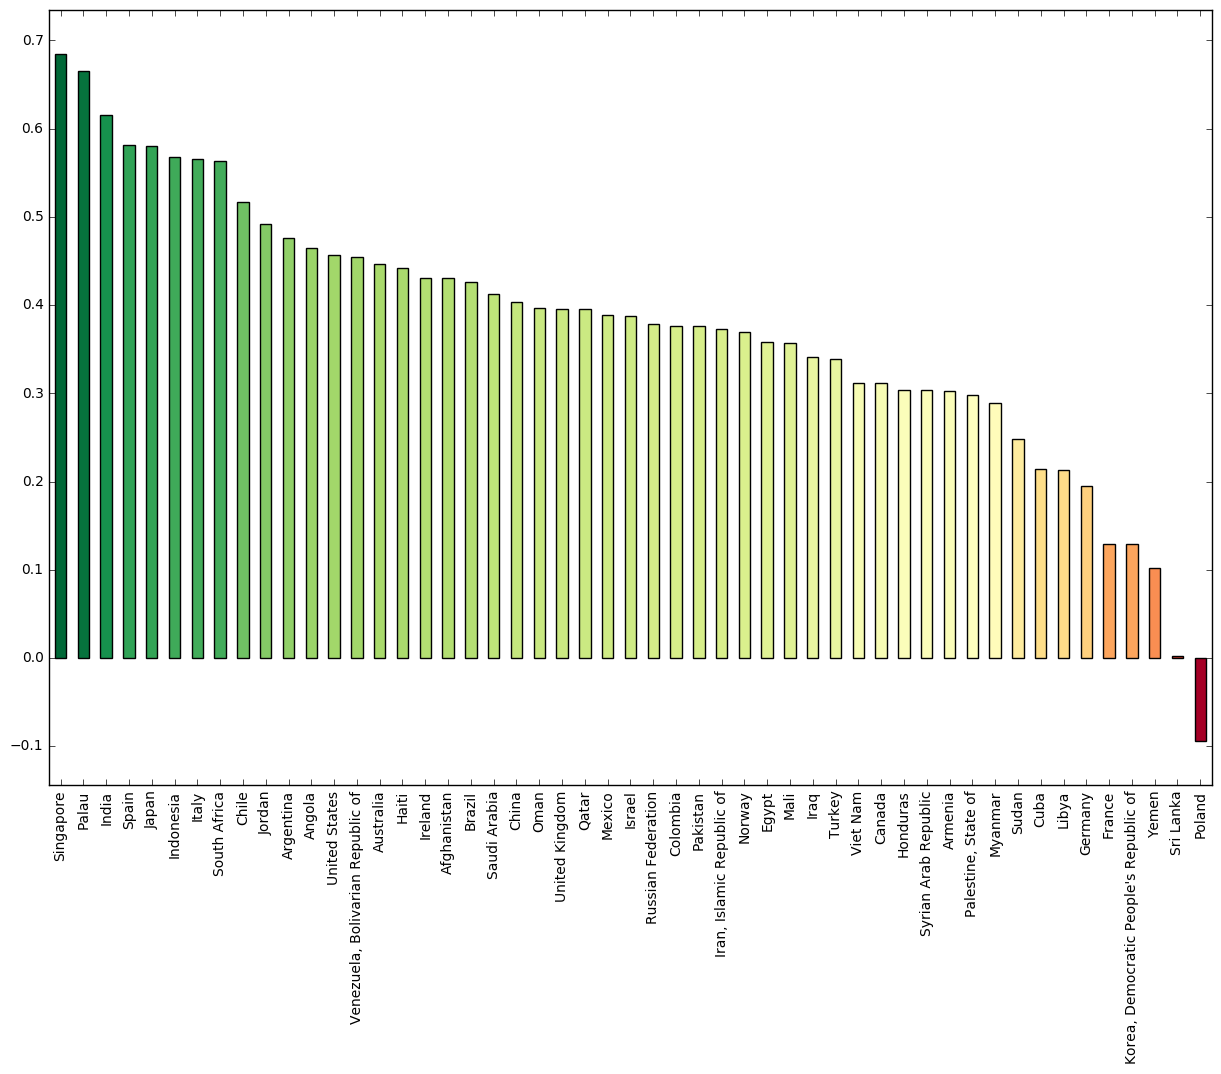

In [33]:
matplotlib.rcParams['figure.figsize'] = (15.0, 10.0)
temp_df = countries_df['sentiment_vader_float_norm'].sort_values(ascending=False, inplace=False)
x_labels = [improved_country_list[index][2] for index in list(temp_df.index)]
cmap = matplotlib.cm.get_cmap('RdYlGn')
# colors = [cmap(np.log2(31 * val + 1) / 5) for val in list((temp_df - temp_df.min()) / (temp_df.max() - temp_df.min()))]
colors = [cmap(val) for val in list((temp_df - temp_df.min()) / (temp_df.max() - temp_df.min()))]
ax = temp_df.plot(kind='bar', color=colors, ylim=(temp_df.min() - 0.05, temp_df.max() + 0.05))
_ = ax.set_xticklabels(x_labels)

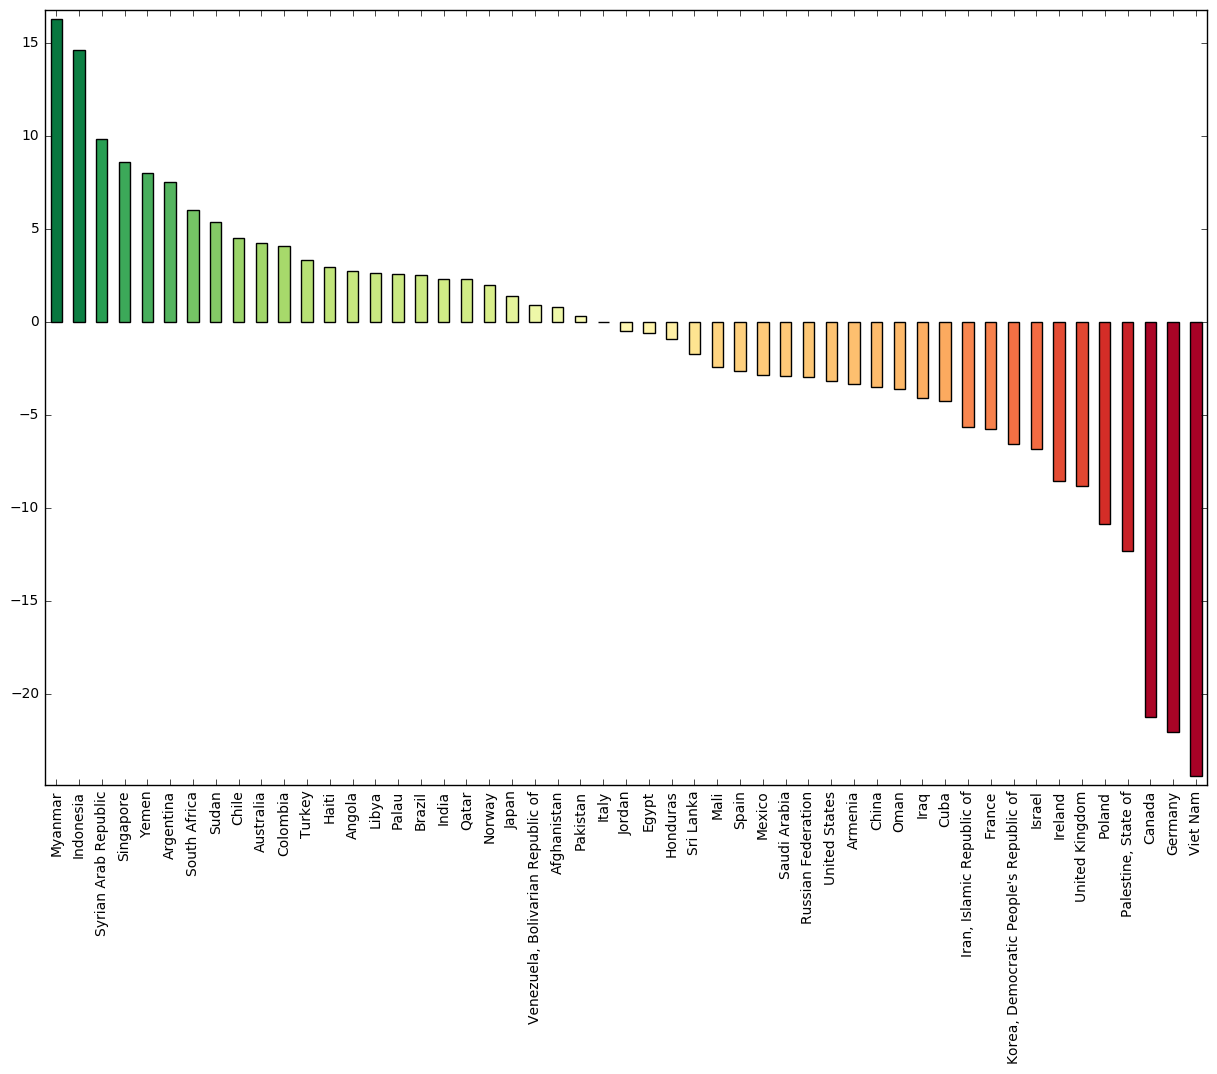

In [34]:
temp_df = countries_df['sentiment_liu_hu_lexicon_norm'].sort_values(ascending=False, inplace=False)
x_labels = [improved_country_list[index][2] for index in list(temp_df.index)]
cmap = matplotlib.cm.get_cmap('RdYlGn')
colors = [cmap(1 / (1 + np.exp(-10 * val))) for val in list(temp_df / 2 / max(np.abs(temp_df.min()), np.abs(temp_df.max())))]
ax = temp_df.plot(kind='bar', color=colors, ylim=(temp_df.min() - 0.5, temp_df.max() + 0.5))
_ = ax.set_xticklabels(x_labels)

The results obtained from the two sentiment analysis methods are completely different. The question is if it is because the two sentiment analysis methods are so different of there is a mistake in the pipeline. (TODO)

## Task 3

> Using the `models.ldamodel` module from the [gensim library](https://radimrehurek.com/gensim/index.html), run topic
modeling over the corpus. Explore different numbers of topics (varying from 5 to 50), and settle for the parameter which
returns topics that you consider to be meaningful at first sight.

First we have counted the frequency of each otken in the corpus. 

In [145]:
list_of_all_tokens_in_corpus = list(itertools.chain(*df['norm_tokens'].tolist())) # flatten list of lists from Series
token_corpus_frequencies = Counter(list_of_all_tokens_in_corpus)
del token_corpus_frequencies['']
token_corpus_frequencies.most_common(25)

[('say', 2111),
 ('state', 1792),
 ('call', 1549),
 ('us', 1403),
 ('secretary', 1362),
 ('obama', 1222),
 ('work', 1215),
 ('get', 1175),
 ('office', 1144),
 ('time', 1138),
 ('president', 1122),
 ('new', 1103),
 ('go', 1084),
 ('make', 1071),
 ('also', 1010),
 ('see', 997),
 ('house', 969),
 ('know', 922),
 ('department', 887),
 ('year', 864),
 ('want', 859),
 ('h', 845),
 ('fyi', 826),
 ('people', 824),
 ('think', 821)]

Afterwards, we have filtered out tokens with frequency less than 25. We ahve assumed that a wrd that appears only few times cannot really be part of a few general topic of the corpus. This way we have decreased the set of tokens taken in to consideration down to something over 1500. This can also make the computation of the topics faster.

In [146]:
token_corpus_filtered = [token for token, frequency in token_corpus_frequencies.items() if frequency >= 25 ]
print(str(len(token_corpus_frequencies)) + ' vs. ' + str(len(token_corpus_filtered)))

26737 vs. 2104


As the next step, using the list of tokens with sufficient frequencies we have filtered the emails. 

In [147]:
def generate_tokens_for_topic_modelling(row):
    return [token for token in row['norm_tokens'] if token in token_corpus_filtered]

texts = df.apply(generate_tokens_for_topic_modelling, axis=1).tolist()
texts = list(filter(None, texts)) # remove empty lists
texts[:3]

[['b6',
  'thursday',
  'march',
  'h',
  'aid',
  'qaddafi',
  'sid',
  'hrc',
  'memo',
  'aid',
  'libya',
  'hrc',
  'memo',
  'aid',
  'libya',
  'march',
  'hillary'],
 ['thx'],
 ['h',
  'hrod17',
  'clintonemailcom',
  'friday',
  'march',
  'huma',
  'abedin',
  'fw',
  'h',
  'aid',
  'qaddafi',
  'sid',
  'hrc',
  'memo',
  'aid',
  'libya',
  'pis',
  'print']]

In the end, we have generated topics from corpus using LdaModel function from gensim library.

In [148]:
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
model = models.LdaModel(corpus, id2word=dictionary, num_topics=10)
model.print_topics()

[(0,
  '0.020*"conflict" + 0.019*"state" + 0.016*"war" + 0.014*"force" + 0.013*"mcchrystal" + 0.013*"iraq" + 0.012*"us" + 0.012*"military" + 0.012*"diplomacy" + 0.011*"boehner"'),
 (1,
  '0.019*"call" + 0.016*"see" + 0.016*"bloomberg" + 0.015*"m" + 0.013*"know" + 0.012*"let" + 0.011*"time" + 0.011*"tomorrow" + 0.011*"back" + 0.010*"w"'),
 (2,
  '0.010*"afghan" + 0.010*"afghanistan" + 0.009*"effort" + 0.009*"security" + 0.009*"us" + 0.008*"holbrooke" + 0.007*"strategy" + 0.007*"secretary" + 0.007*"civilian" + 0.007*"say"'),
 (3,
  '0.012*"obama" + 0.012*"say" + 0.009*"party" + 0.007*"president" + 0.007*"new" + 0.006*"mr" + 0.006*"make" + 0.005*"state" + 0.005*"political" + 0.005*"us"'),
 (4,
  '0.013*"say" + 0.007*"know" + 0.007*"new" + 0.007*"clinton" + 0.007*"american" + 0.006*"vote" + 0.006*"right" + 0.006*"company" + 0.006*"woman" + 0.005*"member"'),
 (5,
  '0.023*"call" + 0.010*"get" + 0.010*"israel" + 0.010*"say" + 0.009*"want" + 0.008*"also" + 0.007*"make" + 0.007*"ok" + 0.007*"t

In the result we can see that the generated topics contain too many generic verbs. That is why we have decided to generate topics only on tokens that are tagged as nouns and adjectives, as we consider these two parts of speech to be most suitable for topic definition. Therefore, in the next step for each email we have generated a list of noun and adjective tokens.

In [159]:
df['norm_tokens_noun_adj'] = np.empty((len(df), 0)).tolist() # create dataframe column with empty lists

def get_norm_tokens_noun_adj(row):
    tokens = nltk.word_tokenize(row['ExtractedBodyText'])
    tokens_wo_punctuation = [token for token in tokens if token not in ['.', ',', '!', '?', ':', '-', '&', '<', '>', ';', '"', '@', '(', ')', "''", '``', '—', '--', "'", '[', ']', '•', '%', '...', '-•-', '-^']]
    my_stopwords = stopwords.words('english')
    my_stopwords.extend(["n't", 'pm'])
    tokens_wo_stopwords = [token for token in tokens_wo_punctuation if token.lower() not in my_stopwords]
    tokens_tagged = nltk.pos_tag(tokens_wo_stopwords)
    lemmed_tokens  = [lemmed_token for lemmed_token, wordnet_pos in (lemmatize(token, part_of_speech) for token, part_of_speech in tokens_tagged) if wordnet_pos in [wordnet.NOUN, wordnet.ADJ]]
    norm_tokens = [normalize_token(token) for token in lemmed_tokens]
    return norm_tokens

df['norm_tokens_noun_adj'] = df.apply(get_norm_tokens_noun_adj, axis=1)
df['norm_tokens_noun_adj']

0                                                      []
1       [b6, thursday, march, h, latest, syria, qaddaf...
2                                                   [thx]
3                                                      []
4       [h, hrod17, clintonemailcom, friday, march, hu...
5       [pis, print, h, hrod17, clintonernailcom, wedn...
6                                                      []
7       [h, hrod17, clintonemailcorn, friday, march, h...
8                                                   [fyi]
9       [b6, wednesday, september, fwd, libya, libya, ...
10                                              [fyi, b6]
11      [b6, wednesday, september, fwd, libya, libya, ...
12                                                  [fyi]
13      [annemarie, slaughter, sunday, march, jacob, m...
14      [, , randolph, lawrence, sent, wednesday, sept...
15      [attend, svtc, today, embassy, tripoli, many, ...
16                           [hope, see, picture, kamala]
17            

Next, we have continued as before, by filtering out tokens with frequency less than 25. Then, same as before, we have used the list of tokens with sufficient frequencies to filter the every email. Consequently, we have generated 10 topics from the emails.

In [160]:
list_of_all_tokens_in_corpus = list(itertools.chain(*df['norm_tokens_noun_adj'].tolist())) # flatten list of lists from Series
token_corpus_frequencies = Counter(list_of_all_tokens_in_corpus)
del token_corpus_frequencies['']

token_corpus_filtered = [token for token, frequency in token_corpus_frequencies.items() if frequency >= 25 ]
print(str(len(token_corpus_frequencies)) + ' vs. ' + str(len(token_corpus_filtered)))

24070 vs. 1681


In [163]:
def generate_tokens_for_topic_modelling(row):
    return [token for token in row['norm_tokens_noun_adj'] if token in token_corpus_filtered]

texts = df.apply(generate_tokens_for_topic_modelling, axis=1).tolist()
texts = list(filter(None, texts)) # remove empty lists
texts[:3]

[['b6',
  'thursday',
  'march',
  'h',
  'qaddafi',
  'sid',
  'hrc',
  'memo',
  'libya',
  'hrc',
  'memo',
  'libya',
  'march',
  'hillary'],
 ['thx'],
 ['h',
  'hrod17',
  'clintonemailcom',
  'friday',
  'march',
  'huma',
  'abedin',
  'fw',
  'h',
  'qaddafi',
  'sid',
  'hrc',
  'memo',
  'libya',
  'pis',
  'print']]

In [164]:
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
model = models.LdaModel(corpus, id2word=dictionary, num_topics=10)
model.print_topics()

[(0,
  '0.012*"new" + 0.008*"american" + 0.008*"last" + 0.008*"president" + 0.008*"day" + 0.008*"year" + 0.007*"mr" + 0.007*"time" + 0.007*"woman" + 0.007*"leader"'),
 (1,
  '0.065*"fyi" + 0.015*"talk" + 0.011*"mtg" + 0.010*"good" + 0.009*"new" + 0.009*"h" + 0.007*"security" + 0.007*"secretary" + 0.007*"us" + 0.006*"night"'),
 (2,
  '0.041*"office" + 0.040*"secretary" + 0.025*"treaty" + 0.024*"room" + 0.024*"meeting" + 0.017*"time" + 0.017*"conference" + 0.015*"state" + 0.014*"private" + 0.014*"department"'),
 (3,
  '0.053*"stategov" + 0.044*"h" + 0.030*"israel" + 0.024*"fw" + 0.023*"clintonemailcom" + 0.020*"hrod17" + 0.020*"israeli" + 0.018*"monday" + 0.017*"december" + 0.016*"cheryl"'),
 (4,
  '0.015*"obama" + 0.014*"nuclear" + 0.013*"new" + 0.013*"us" + 0.009*"start" + 0.008*"party" + 0.008*"president" + 0.007*"world" + 0.007*"republican" + 0.007*"political"'),
 (5,
  '0.029*"state" + 0.021*"us" + 0.018*"secretary" + 0.016*"department" + 0.016*"house" + 0.014*"cable" + 0.014*"clint

We can see that although we got rid of some verbs, many of them remained beacause TreeBank pos-tagger considers them to be nouns (i.e. need). Also, there are severeal tokens that does not help with topic definition for human reader (i.e. thx, fw, pls, ok etc.). Thus we have decided to create list of topic stopwords with hope to obtain better results. We have chosen the stopwords arbitrarily.

In [216]:
list_of_all_tokens_in_corpus = list(itertools.chain(*df['norm_tokens_noun_adj'].tolist())) # flatten list of lists from Series
token_corpus_frequencies = Counter(list_of_all_tokens_in_corpus)
del token_corpus_frequencies['']

topic_stopwords = ['time', 'h', 'call', 'fyi', 'mr', 'dr', 'stategov', 'today', 'last', 'week', 'tomorrow', 'also', 
                   'get', 'say', 'go', 'see', 'make', 'know', 'take', 'need', 'come', 'talk', 'give', 'tell', 'mrs', 
                   'ask', 'w', 'm', 'send', 'arrive', 'write', 'felt', 'bit', 'even', 'let', 'try', 'thx', 'fw', 'print', 
                   'sent', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday', 'b6', 'b5', 'j', 
                   'u', 'b', 'ok', 'pls', 'b1', 'en', 'thank', 'thanks', 'sure', 'please']
for topic_stopword in topic_stopwords:
    token_corpus_frequencies.pop(topic_stopword, None)

token_corpus_filtered = [token for token, frequency in token_corpus_frequencies.items() if frequency >= 25 ]
print(str(len(token_corpus_frequencies)) + ' vs. ' + str(len(token_corpus_filtered)))

def generate_tokens_for_topic_modelling(row):
    return [token for token in row['norm_tokens_noun_adj'] if token in token_corpus_filtered]

texts = df.apply(generate_tokens_for_topic_modelling, axis=1).tolist()
texts = list(filter(None, texts)) # remove empty lists

24011 vs. 1626


In [217]:
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
model = models.LdaModel(corpus, id2word=dictionary, num_topics=10)
model.print_topics()

[(0,
  '0.013*"new" + 0.011*"state" + 0.010*"party" + 0.010*"office" + 0.009*"year" + 0.009*"senate" + 0.009*"iran" + 0.008*"obama" + 0.008*"house" + 0.008*"us"'),
 (1,
  '0.016*"taliban" + 0.014*"state" + 0.013*"us" + 0.010*"income" + 0.009*"obama" + 0.008*"dollar" + 0.008*"house" + 0.008*"koch" + 0.008*"afghan" + 0.008*"china"'),
 (2,
  '0.020*"percent" + 0.019*"republican" + 0.016*"democrats" + 0.014*"vote" + 0.014*"republicans" + 0.013*"voter" + 0.013*"obama" + 0.012*"election" + 0.011*"party" + 0.011*"poll"'),
 (3,
  '0.009*"new" + 0.009*"us" + 0.009*"obama" + 0.008*"people" + 0.008*"government" + 0.008*"country" + 0.007*"year" + 0.007*"president" + 0.007*"party" + 0.006*"american"'),
 (4,
  '0.023*"israel" + 0.013*"israeli" + 0.011*"settlement" + 0.009*"peace" + 0.009*"obama" + 0.008*"good" + 0.008*"day" + 0.007*"david" + 0.007*"american" + 0.006*"work"'),
 (5,
  '0.011*"obama" + 0.010*"clinton" + 0.010*"president" + 0.008*"new" + 0.008*"woman" + 0.008*"state" + 0.008*"us" + 0.00

So we got some result. The task suggests trying different number of topics and comparing between the quality of the output. However, the quality given number of topics is difficult to be judged as LDA is undeterministic and the quality of the results varies significatnly even with constant nuber of topics. In theory the loweer the numbe rof topics the more general they are. The higher the number of topics the more specific they are and the more with fit particular email than the topic in it.

In [218]:
texts = [text for text in texts if len(text) >= 5]

In [219]:
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
model = models.LdaModel(corpus, id2word=dictionary, num_topics=10)
model.print_topics()

[(0,
  '0.009*"boehner" + 0.008*"cheryl" + 0.007*"people" + 0.007*"us" + 0.006*"new" + 0.006*"speech" + 0.006*"mills" + 0.006*"good" + 0.006*"state" + 0.005*"day"'),
 (1,
  '0.011*"obama" + 0.010*"us" + 0.008*"israel" + 0.008*"government" + 0.008*"new" + 0.007*"year" + 0.007*"security" + 0.007*"people" + 0.007*"bill" + 0.007*"policy"'),
 (2,
  '0.026*"state" + 0.016*"us" + 0.014*"secretary" + 0.009*"department" + 0.008*"clinton" + 0.008*"new" + 0.007*"government" + 0.007*"part" + 0.006*"president" + 0.006*"release"'),
 (3,
  '0.026*"state" + 0.016*"department" + 0.016*"office" + 0.015*"house" + 0.013*"us" + 0.012*"secretary" + 0.009*"room" + 0.008*"meeting" + 0.007*"case" + 0.006*"date"'),
 (4,
  '0.054*"office" + 0.052*"secretary" + 0.026*"meeting" + 0.023*"state" + 0.022*"room" + 0.019*"department" + 0.018*"depart" + 0.017*"private" + 0.017*"route" + 0.016*"residence"'),
 (5,
  '0.012*"obama" + 0.011*"president" + 0.009*"new" + 0.009*"american" + 0.008*"woman" + 0.008*"israel" + 0.00

Here we have tried not taking into account short emails. However, it did not visibly improve our results